<a href="https://colab.research.google.com/github/fav579/Hng-stage-2-task/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Specify the file paths
file_paths = [
    "/content/lagos_weeather_data_2002_to_2024 - Copy.csv",
    "/content/Flood_event .xlsx",
    "/content/predicted_dates_high_precipitation.xlsx",
]

# Read each CSV file into a DataFrame and store in a list
dfs = [pd.read_csv(file_path) for file_path in file_paths if file_path.endswith('.csv')]

# If you want to combine these DataFrames, you can use pd.concat
# df_combined = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the first DataFrame
if dfs:  # Check if any CSV files were read
    print(dfs[0].head())


   datetime  tempmin  temp   dew  humidity  precip  precipprob  precipcover  \
0  1/1/2002     25.6  27.2  25.2      88.7     0.0         0.0          0.0   
1  1/2/2002     26.1  29.0  25.1      80.5     0.0         0.0          0.0   
2  1/3/2002     25.1  29.1  23.2      74.6     0.0         0.0          0.0   
3  1/4/2002     33.1  33.1  24.1      59.3     0.0         0.0          0.0   
4  1/5/2002     25.6  28.3  25.4      85.0     0.0         0.0          0.0   

  preciptype  windgust  windspeed  cloudcover  visibility        conditions  \
0        NaN       NaN       16.6        90.0         6.5  Partially cloudy   
1        NaN       NaN       18.4        90.0         8.4  Partially cloudy   
2        NaN       NaN       18.4        90.0         4.9  Partially cloudy   
3        NaN       NaN       14.8        90.0         8.0  Partially cloudy   
4        NaN       NaN       20.5        90.0         5.3  Partially cloudy   

                         description  windspeedmax

In [ ]:
# Check for missing values
missing_values=df.isnull().sum()

# Check data types
df.dtypes

# Convert date column to datetime if it's not already
# Convert date column to datetime, specifying the correct format
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y')

# Display missing values
missing_values


datetime           0
tempmin          591
temp             823
dew              823
humidity         823
precip           823
precipprob       823
precipcover        0
preciptype      4940
windgust        2800
windspeed        598
cloudcover       823
visibility      1025
conditions      1179
description     1179
windspeedmax    8310
windspeedmin    8310
year               0
month              0
day                0
dtype: int64

In [ ]:
from dateutil import parser

# Function to parse dates with inconsistent formats
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y')
    except ValueError:
        return pd.to_datetime(date_str, format='%d/%m/%Y')

# Apply the function to the datetime column
df['datetime'] = df['datetime'].apply(parse_date)

# Check for missing values again
missing_values = df.isnull().sum()

# Display missing values
missing_values


datetime           0
tempmin          591
temp             823
dew              823
humidity         823
precip           823
precipprob       823
precipcover        0
preciptype      4940
windgust        2800
windspeed        598
cloudcover       823
visibility      1025
conditions      1179
description     1179
windspeedmax    8310
windspeedmin    8310
dtype: int64

In [ ]:
# Fill missing values in the 'precip' column with forward fill method
df['precip'].fillna(method='ffill', inplace=True)

# Ensure no missing values in 'precip' column
missing_precip = df['precip'].isnull().sum()
print(missing_precip)


0


In [ ]:
# Summary Statistics
summary_stats = df.describe()
print(summary_stats)

                            datetime      tempmin         temp          dew  \
count                           8676  8085.000000  7853.000000  7853.000000   
mean   2013-10-19 03:25:08.713692672    23.770860    27.433949    23.977550   
min              2002-01-01 00:00:00     0.000000    21.400000     8.200000   
25%              2007-12-09 18:00:00    23.100000    26.200000    23.500000   
50%              2013-11-16 12:00:00    24.100000    27.400000    24.200000   
75%              2019-10-25 06:00:00    25.600000    28.600000    25.000000   
max              2024-12-03 00:00:00    34.600000    34.600000    66.500000   
std                              NaN     4.508929     1.601799     1.934448   

          humidity       precip   precipprob  precipcover     windgust  \
count  7853.000000  8676.000000  7853.000000  8676.000000  5876.000000   
mean     82.685916     4.594329    43.282822     4.815538    29.259547   
min      33.800000     0.000000     0.000000     0.000000     0.00

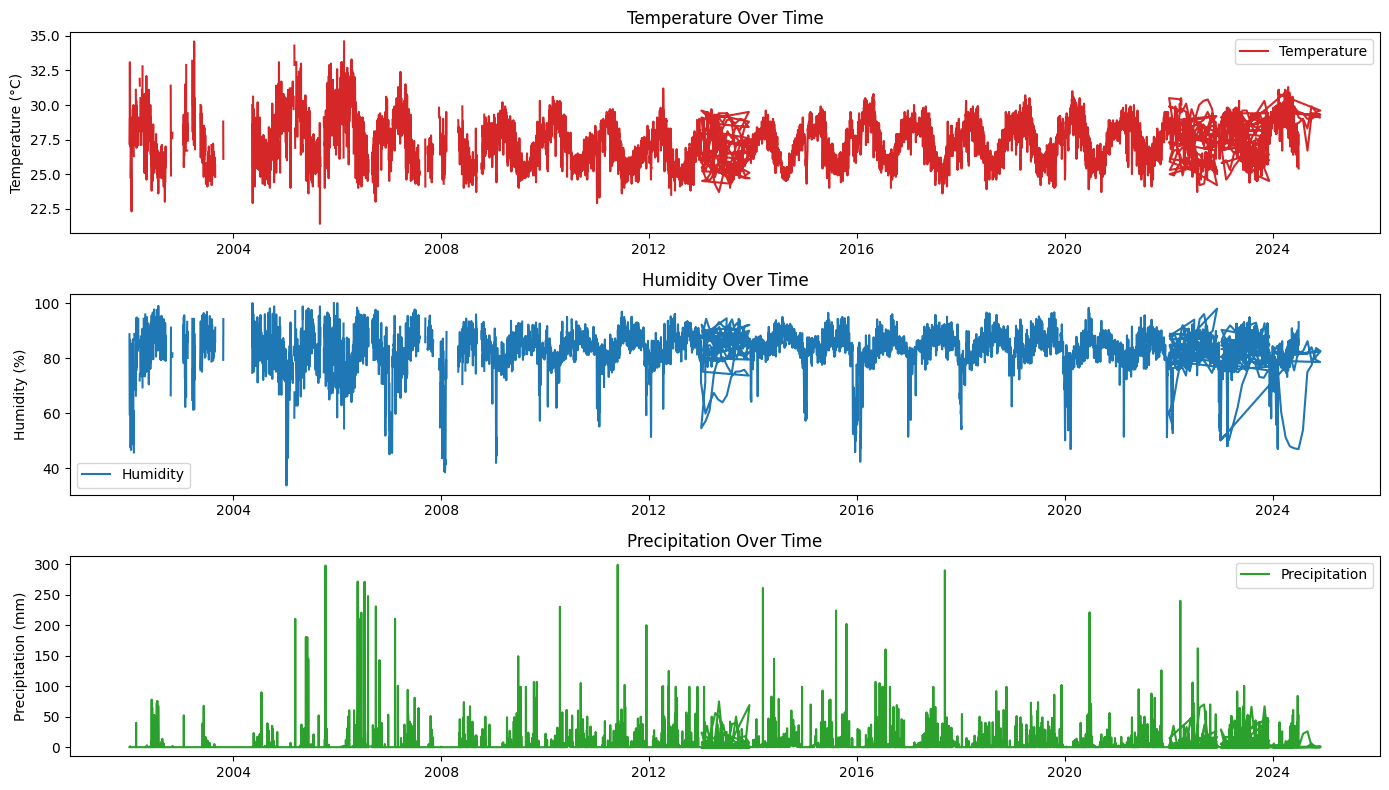

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
"""
# Convert 'Datetime' to datetime format
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y')

# Set the 'Datetime' column as the index
df.set_index('datetime', inplace=True)
"""
# Plotting the time series data
plt.figure(figsize=(14, 8))

# Temperature
plt.subplot(3, 1, 1)
plt.plot(df.index, df['temp'], label='Temperature', color='tab:red')
plt.title('Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.legend()
# Humidity
plt.subplot(3, 1, 2)
plt.plot(df.index, df['humidity'], label='Humidity', color='tab:blue')
plt.title('Humidity Over Time')
plt.ylabel('Humidity (%)')
plt.legend()

# Precipitation
plt.subplot(3, 1, 3)
plt.plot(df.index, df['precip'], label='Precipitation', color='tab:green')
plt.title('Precipitation Over Time')
plt.ylabel('Precipitation (mm)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Define features and target variable
features = ['temp', 'humidity', 'precip', 'windspeed', 'cloudcover']
# Creating a binary target variable for demonstration purposes
df['flood_event'] = (df['precip'] > 50).astype(int)  # Assuming floods happen when precip > 50mm


In [ ]:
# Splitting the data into training and testing sets
X = df[features]
y = df['flood_event']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print(df.isna().sum())


datetime           0
tempmin          591
temp             823
dew              823
humidity         823
precip             0
precipprob       823
precipcover        0
preciptype      4940
windgust        2800
windspeed        598
cloudcover       823
visibility      1025
conditions      1179
description     1179
windspeedmax    8310
windspeedmin    8310
year               0
month              0
day                0
flood_event        0
dtype: int64


In [ ]:
# Example: Filling missing values with the mean for numeric columns
df['temp'] = df['temp'].fillna(df['temp'].mean())
df['humidity'] = df['humidity'].fillna(df['humidity'].mean())
df['precip'] = df['precip'].fillna(df['precip'].mean())
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].mean())
df['cloudcover'] = df['cloudcover'].fillna(df['cloudcover'].mean())


In [ ]:
df = df.dropna(subset=['temp', 'humidity', 'precip', 'windspeed', 'cloudcover'])


In [ ]:
print(df[features].isna().sum())


temp          0
humidity      0
precip        0
windspeed     0
cloudcover    0
dtype: int64


In [ ]:
# Splitting the data into training and testing sets
X = df[features]
y = df['flood_event']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Initialize and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2548
           1       1.00      1.00      1.00        55

    accuracy                           1.00      2603
   macro avg       1.00      1.00      1.00      2603
weighted avg       1.00      1.00      1.00      2603



In [ ]:
# Predict future flood events using recent data
recent_data = df[df['year'] == 2024][features]
future_floods = model.predict(recent_data)

# Assuming the predicted flood event dates are stored
predicted_flood_dates = df[df['year'] == 2024]['datetime'][future_floods == 1]
print(f'Predicted flood dates in 2024: {predicted_flood_dates}')


Predicted flood dates in 2024: 8633   2024-05-22
8636   2024-05-25
8668   2024-06-26
8675   2024-07-03
Name: datetime, dtype: datetime64[ns]
